In [324]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [325]:
df = pd.read_csv('rainfall_dataset.csv', parse_dates =['date'], index_col=['date'])
df.head(10)


,Year,Month,day of week,Rainfall amount (millimetres)
date,,,,
2015-01-01,2015,Jan,Thursday,0.0
2015-01-02,2015,Jan,Friday,0.0
2015-01-03,2015,Jan,Saturday,0.0
2015-01-04,2015,Jan,Sunday,4.2
2015-01-05,2015,Jan,Monday,0.0
2015-01-06,2015,Jan,Tuesday,0.0
2015-01-07,2015,Jan,Wednesday,0.0
2015-01-08,2015,Jan,Thursday,19.4
2015-01-09,2015,Jan,Friday,1.2


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2251 entries, 2015-01-01 to 2021-02-28
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           2251 non-null   int64  
 1   Month                          2251 non-null   object 
 2   day of week                    2251 non-null   object 
 3   Rainfall amount (millimetres)  2251 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 87.9+ KB


In [327]:
df.describe()

,Year,Rainfall amount (millimetres)
count,2251.000000,2251.000000
mean,2017.592181,1.518257
std,1.776341,4.392522
min,2015.000000,0.000000
25%,2016.000000,0.000000
50%,2018.000000,0.000000
75%,2019.000000,0.800000
max,2021.000000,54.600000


In [328]:
#cheack missing value
print(df.isnull().sum(axis=0))

Year                             0
Month                            0
day of week                      0
Rainfall amount (millimetres)    0
dtype: int64


In [329]:
for col_name in df.columns:
    print('\nUnique value in column', col_name, 'is:\n')
    print(df[col_name].unique())
    print('\n-----------------\n')


Unique value in column Year is:

[2015 2016 2017 2018 2019 2020 2021]

-----------------


Unique value in column Month is:

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

-----------------


Unique value in column day of week is:

['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']

-----------------


Unique value in column Rainfall amount (millimetres) is:

[ 0.          4.2        19.4         1.2         5.2        15.8
  1.          0.6         9.2         3.8        19.6         0.4
  1.6         3.2         0.8         0.2         2.2         1.4
  5.6         2.4         3.6         6.4         3.          7.
  4.          8.6         2.6         6.8         4.4         1.8
  6.2         8.2         1.33220749  5.          2.         28.4
 17.4        12.2        17.6         6.         30.6        14.2
 10.6         8.4        13.4         5.8        12.8        21.6
  9.8         5.4        12.         12.4         4.8       

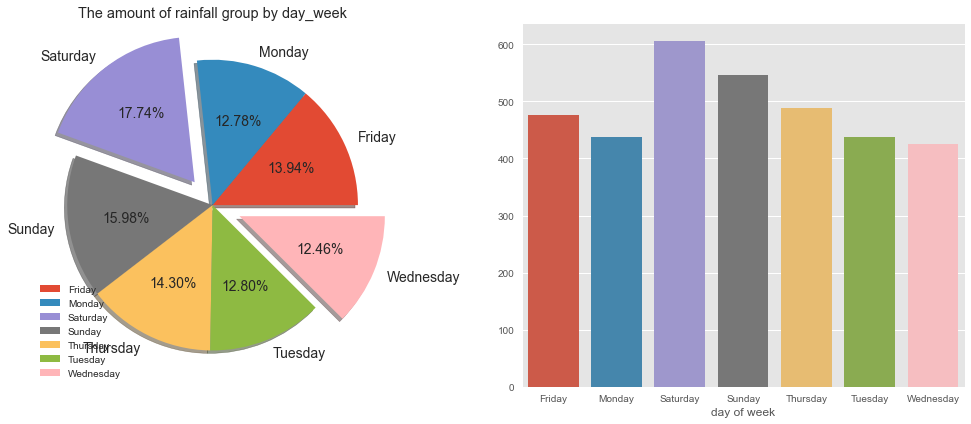

In [330]:
#insepct col Rainfall amount group by day
values = df.groupby(['day of week'])['Rainfall amount (millimetres)'].sum().values
labels = df.groupby(['day of week'])['Rainfall amount (millimetres)'].sum().index

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

plt.style.use('ggplot')
explode = [0.0, 0, 0.2 , 0, 0, 0, 0.2]
ax1.pie(
       values, 
       labels = labels,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode,
       textprops={'fontsize':14}
)

ax1.set(title = 'The amount of rainfall group by day_week')
ax1.legend(loc = 3)




sns.barplot(x = labels, y=values, ax = ax2)
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


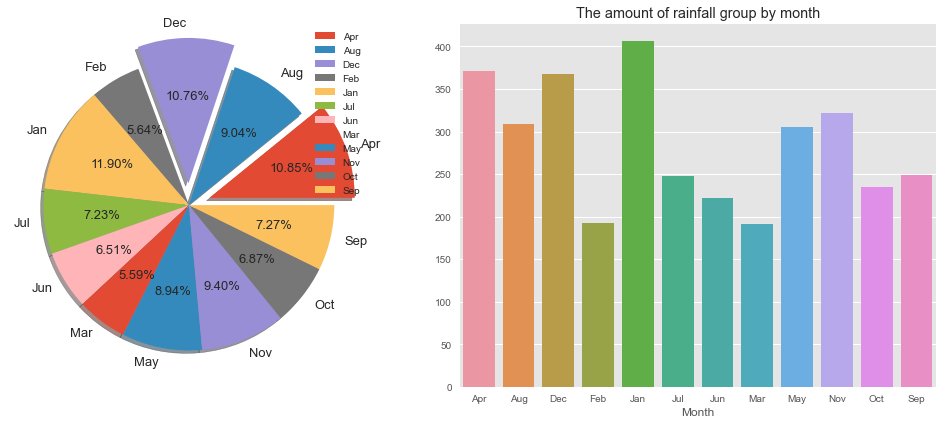

In [331]:
#insepct col Rainfall amount group by month

values_month = df.groupby(['Month'])['Rainfall amount (millimetres)'].sum().values
labels_month = df.groupby(['Month'])['Rainfall amount (millimetres)'].sum().index
explode_2 = [0.15, 0.0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0]

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

ax1.pie(
       values_month, 
       labels = labels_month,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode_2 ,
       textprops={'fontsize':13})

ax1.legend(loc = 0)

sns.barplot(x= labels_month, y= values_month, ax= ax2)

plt.title('The amount of rainfall group by month')
plt.legend(loc = 2)
plt.tight_layout()
plt.show()








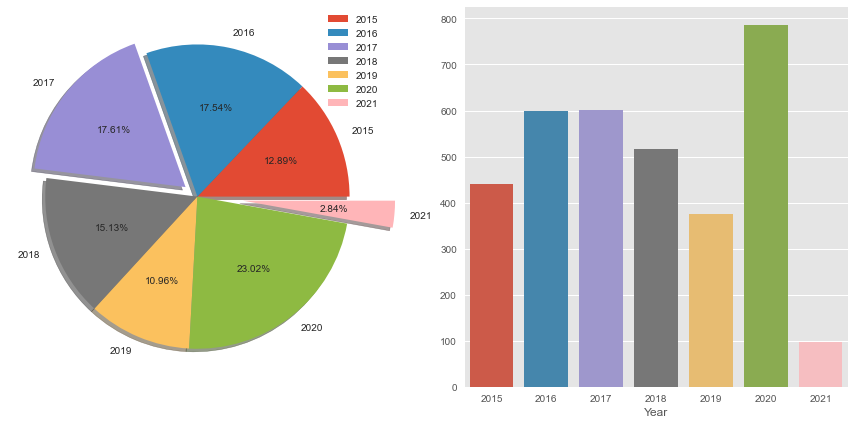

In [332]:
#insepct col Rainfall amount groub by year

values_year = df.groupby(['Year'])['Rainfall amount (millimetres)'].sum().values
labels_year = df.groupby(['Year'])['Rainfall amount (millimetres)'].sum().index

fig,(ax1,ax2)  = plt.subplots(nrows =1, ncols = 2, figsize= (12,6))


explode_3 = [0, 0, 0.1, 0, 0, 0,0.3]
ax1.pie(
       values_year, 
       labels = labels_year,
       shadow = True,
       autopct= '%0.2f%%',
       explode = explode_3
)

ax1.legend(loc = 1)

sns.barplot(x = labels_year, y=values_year, ax =ax2)
plt.tight_layout()
plt.show()



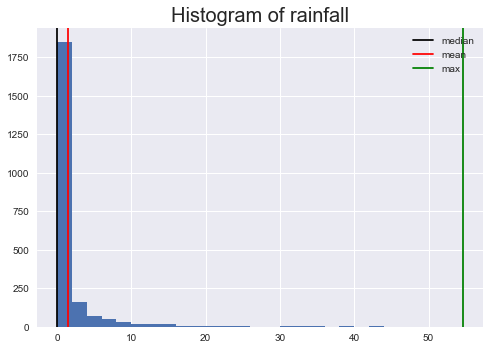

In [333]:
rainfall_amount = df['Rainfall amount (millimetres)'].values
#hist
plt.figure(1)
plt.style.use('seaborn')
plt.hist(rainfall_amount,
        range = (0,50),
        bins = 25)
plt.axvline(np.quantile(rainfall_amount, 0.5), c = 'black', label= 'median')
plt.axvline(np.mean(rainfall_amount), c = 'r', label ='mean')
plt.axvline(np.amax(rainfall_amount), c = 'green', label ='max')
#plt.axvline(np.amin(rainfall_amount), c = 'green', label ='min')
plt.title('Histogram of rainfall', fontsize= 20)
plt.legend( loc = 'upper right')
plt.show()


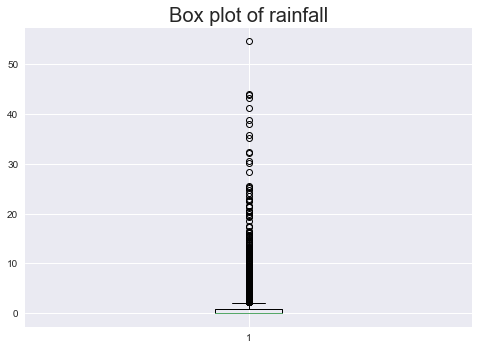

median 0.0
mean 1.5182570512941735
max 54.6
min 0.0


In [334]:
# boxplot
plt.figure(2)
plt.boxplot(rainfall_amount)
plt.title('Box plot of rainfall', fontsize= 20)
plt.show()

print('median',np.median(rainfall_amount))
print('mean',np.average(rainfall_amount))
print('max',np.amax(rainfall_amount))
print('min',np.amin(rainfall_amount))

In [343]:
df_index.resample('M')

Text(0.5, 1.0, 'Month')

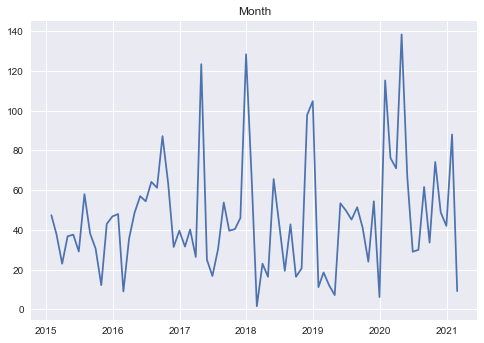

In [335]:
plt.plot(df_index.resample('M').sum())
plt.title('Month')

In [342]:
df_index.resample('10D')

Text(0.5, 1.0, '10 DAY')

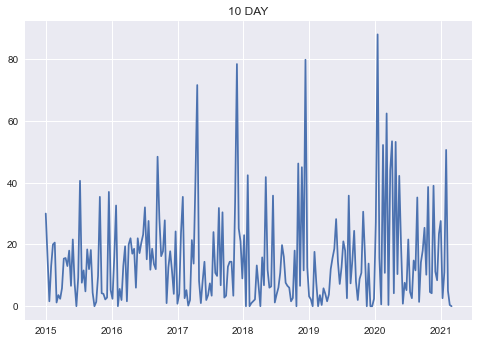

In [336]:
plt.plot(df_index.resample('10D').sum())
plt.title('10 DAY')

In [341]:
df_index.resample('7D').sum()

,Rainfall amount (millimetres)
date,
2015-01-01,4.2
2015-01-08,41.6
2015-01-15,0.0
2015-01-22,1.6
2015-01-29,13.0
...,...
2021-01-28,46.8
2021-02-04,4.2
2021-02-11,4.6


Text(0.5, 1.0, '7 DAY')

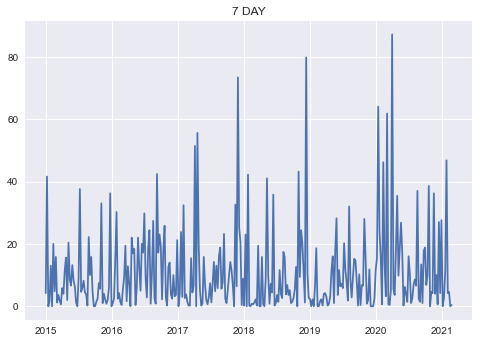

In [337]:
plt.plot(df_index.resample('7D').sum())
plt.title('7 DAY')

In [340]:
df_index.resample('1Y').sum()

,Rainfall amount (millimetres)
date,
2015-12-31,440.532207
2016-12-31,599.600000
2017-12-31,602.000000
2018-12-31,517.064415
2019-12-31,374.400000
2020-12-31,786.800000
2021-12-31,97.200000


Text(0.5, 1.0, 'Year')

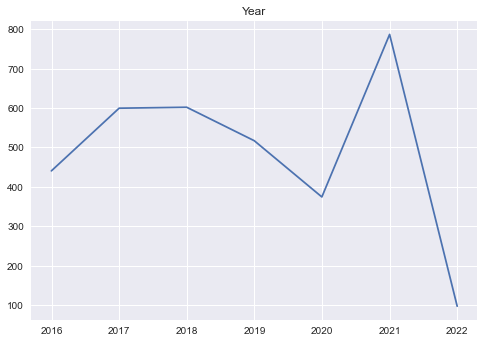

In [338]:
plt.plot(df_index.resample('1Y').sum())
plt.title('Year')


,Rainfall amount (millimetres)
date,
2015-12-31,440.532207
2016-12-31,599.600000
2017-12-31,602.000000
2018-12-31,517.064415
2019-12-31,374.400000
2020-12-31,786.800000
2021-12-31,97.200000
